Data cleaning
* Handling missing values

Import libraries

In [14]:
import pandas as pd
import seaborn as sb

Read data from the csv file.

In [15]:
df =pd.read_csv("./data/landslides.csv")
df.head

<bound method NDFrame.head of         id     date   time   country_name  state/province  population  \
0       34   3/2/07  Night  United States        Virginia       16000   
1       42  3/22/07    NaN  United States            Ohio       17288   
2       56   4/6/07    NaN  United States    Pennsylvania       15930   
3       59  4/14/07    NaN         Canada          Quebec       42786   
4       61  4/15/07    NaN  United States        Kentucky        6903   
...    ...      ...    ...            ...             ...         ...   
1688  7535  12/7/15    NaN  United States  North Carolina        1646   
1689  7537  2/22/16   0:00  United States   West Virginia       51400   
1690  7539  2/23/16    NaN  United States   West Virginia        2406   
1691  7540  2/26/16  21:06  United States   West Virginia        1048   
1692  7541   3/2/16   8:00  United States         Vermont        2066   

          landslide_type   trigger  fatalities  
0              Landslide      Rain         N

In [16]:
df.shape

(1693, 9)

Check and handle missing values.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [18]:
df.isna().sum()

id                   0
date                 3
time              1064
country_name         0
state/province       1
population           0
landslide_type       1
trigger              2
fatalities         247
dtype: int64

In [19]:
df = df[-df['date'].isnull()]
df.head(20)

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
5,64,4/20/07,NaN,United States,Kentucky,6903,Landslide,Rain,NaN
6,67,4/24/07,NaN,United States,South Dakota,2540,Landslide,Rain,NaN
7,77,5/21/07,NaN,Colombia,Risaralda,440118,Mudslide,Rain,13.0
8,105,6/27/07,NaN,Ecuador,Zamora-Chinchipe,15276,Landslide,Downpour,NaN
9,106,6/27/07,NaN,Ecuador,Loja,117796,Landslide,Downpour,NaN


Replacing null values.

In [20]:
df['time'] = df['time'].fillna("Unknown")
df.head(20)

/var/folders/t2/rfkwrp952p53ch06hcfcdnmr0000gn/T/ipykernel_868/2856589136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].fillna("Unknown")


,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,3/22/07,Unknown,United States,Ohio,17288,Landslide,Rain,NaN
2,56,4/6/07,Unknown,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,4/14/07,Unknown,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,4/15/07,Unknown,United States,Kentucky,6903,Landslide,Downpour,0.0
5,64,4/20/07,Unknown,United States,Kentucky,6903,Landslide,Rain,NaN
6,67,4/24/07,Unknown,United States,South Dakota,2540,Landslide,Rain,NaN
7,77,5/21/07,Unknown,Colombia,Risaralda,440118,Mudslide,Rain,13.0
8,105,6/27/07,Unknown,Ecuador,Zamora-Chinchipe,15276,Landslide,Downpour,NaN
9,106,6/27/07,Unknown,Ecuador,Loja,117796,Landslide,Downpour,NaN


In [21]:
df['time'].isna().sum()

np.int64(0)

In [22]:
mean = df['fatalities'].mean()
print(mean)

1.4622314622314623


In [23]:
df['fatalities'] = df['fatalities'].fillna(mean)
df.head(20)

/var/folders/t2/rfkwrp952p53ch06hcfcdnmr0000gn/T/ipykernel_868/1671788881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalities'] = df['fatalities'].fillna(mean)


,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,3/2/07,Night,United States,Virginia,16000,Landslide,Rain,1.462231
1,42,3/22/07,Unknown,United States,Ohio,17288,Landslide,Rain,1.462231
2,56,4/6/07,Unknown,United States,Pennsylvania,15930,Landslide,Rain,1.462231
3,59,4/14/07,Unknown,Canada,Quebec,42786,Riverbank collapse,Rain,1.462231
4,61,4/15/07,Unknown,United States,Kentucky,6903,Landslide,Downpour,0.000000
5,64,4/20/07,Unknown,United States,Kentucky,6903,Landslide,Rain,1.462231
6,67,4/24/07,Unknown,United States,South Dakota,2540,Landslide,Rain,1.462231
7,77,5/21/07,Unknown,Colombia,Risaralda,440118,Mudslide,Rain,13.000000
8,105,6/27/07,Unknown,Ecuador,Zamora-Chinchipe,15276,Landslide,Downpour,1.462231
9,106,6/27/07,Unknown,Ecuador,Loja,117796,Landslide,Downpour,1.462231


Date time parsing using .to_datetime()
* Corret the data type
* Drop any NA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1690 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1690 non-null   int64  
 1   date            1690 non-null   object 
 2   time            1690 non-null   object 
 3   country_name    1690 non-null   object 
 4   state/province  1689 non-null   object 
 5   population      1690 non-null   int64  
 6   landslide_type  1689 non-null   object 
 7   trigger         1688 non-null   object 
 8   fatalities      1690 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 132.0+ KB


In [33]:
df['date']

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1690, dtype: object

In [32]:
df['parsed_date'] = pd.to_datetime(df['date'], format="%m/%d/%y")
df['parsed_date']

/var/folders/t2/rfkwrp952p53ch06hcfcdnmr0000gn/T/ipykernel_868/917236400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_date'] = pd.to_datetime(df['date'], format="%m/%d/%y")


0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: parsed_date, Length: 1690, dtype: datetime64[ns]

In [27]:
month_of_landslide = df['parsed_date'].dt.month
month_of_landslide

0        3
1        3
2        4
3        4
4        4
        ..
1688    12
1689     2
1690     2
1691     2
1692     3
Name: parsed_date, Length: 1690, dtype: int32

<Axes: xlabel='parsed_date', ylabel='Count'>

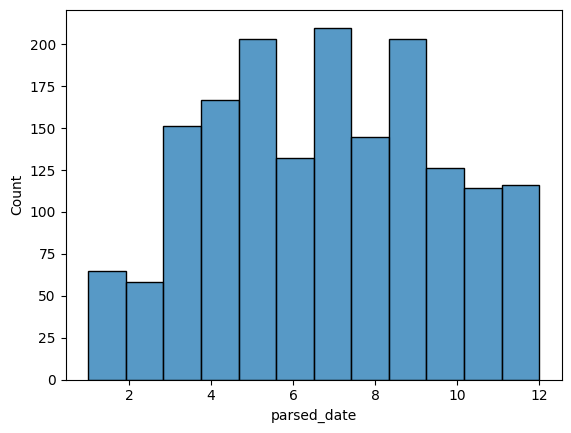

In [28]:
month_of_landslide = month_of_landslide.dropna()
sb.histplot(month_of_landslide, kde=False, bins=12)

Parse date in time series data.

In [29]:
df['time'].value_counts()

time
Unknown          1065
Night              97
Morning            87
Afternoon          58
Early morning      36
                 ... 
23:30               1
14:00               1
9:45                1
0:00                1
21:06               1
Name: count, Length: 159, dtype: int64

In [42]:
def format_time(x):
    if ':' in x.lower():
        if int(x.split(':')[0]) >= 12 and int(x.split(':')[0]) < 18:
            x = "Afternoon"
        elif int(x.split(':')[0]) < 12:
            x = "Morning"
        elif int(x.split(':')[0]) >= 18:
            x = "Night"
    elif 'evening' in x.lower():
        x = "Evening"
    elif 'afternoon' in x.lower():
        x = "Afternoon"
    elif 'night' in x.lower():
        x = "Night"
    else:
        x = "Unknown"
    return x

In [43]:
df['time'] = df['time'].apply(format_time)

/var/folders/t2/rfkwrp952p53ch06hcfcdnmr0000gn/T/ipykernel_868/401691382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['time'].apply(format_time)


In [54]:
df['time'].value_counts()

time
Unknown      1332
Night         194
Afternoon     145
Evening        19
Name: count, dtype: int64